In [1]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [2]:
!pip install pycaret

     |████████████████████████████████| 301 kB 5.4 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 1.3 MB 47.6 MB/s 
     |████████████████████████████████| 15.6 MB 39.7 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 261 kB 45.0 MB/s 
     |████████████████████████████████| 6.8 MB 36.4 MB/s 
     |████████████████████████████████| 114 kB 51.6 MB/s 
     |████████████████████████████████| 167 kB 21.9 MB/s 
     |████████████████████████████████| 1.7 MB 36.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 39.8 MB/s 
     |████████████████████████████████| 102 kB 11.6 MB/s 
     |████████████████████████████████| 303 kB 33.0 MB/s 
     |████████████████████████████████| 10.9 MB 35.3 MB/s 
     |████████████████

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [30]:
# 자체점수 : 0.6666
# 제출 점수(제출 날짜) : 

# 설정

In [31]:
# pycaret : blend(cat/tuned_lgbm)
# probability_threshold : 

# combine
# 순서형 특성 수치형으로 지정(4개) : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [32]:
# 'id', 'contents_open_dt' 제거 : ⭕
# 모든 값이 1인 'person_prefer_f', 'person_prefer_g' 열 제거 : ⭕
# contents_rn 제거 : ⭕

In [33]:
# 차이가 비교적 많이 나는 특성(25+1개)만 훈련/예측 : ⭕

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# h_l_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_i
# contents_attribute_a

# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h
##############################
# person_rn

# 데이터 불러오기

In [34]:
# train = pd.read_csv('../data/train.csv')
# test = pd.read_csv('../data/test.csv')
train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/test.csv')

# 데이터 확인

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [36]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [38]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [39]:
test_col = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
 'person_prefer_e',
 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
 'contents_attribute_i', 'contents_attribute_a',
 'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
 'contents_attribute_l', 'contents_attribute_d',
 'contents_attribute_m', 'contents_attribute_e',
 'contents_attribute_h',
 'person_rn']
target = ['target']
train_col = test_col + target
len(train_col), len(test_col)

(27, 26)

In [40]:
train = train[train_col]
test = test[test_col]

## 훈련에 의미가 적은 열 제거

In [41]:
# train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn'], axis=1) 
# test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn'], axis=1)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   person_attribute_a      501951 non-null  int64
 5   person_attribute_a_1    501951 non-null  int64
 6   person_attribute_b      501951 non-null  int64
 7   person_prefer_c         501951 non-null  int64
 8   person_prefer_d_1       501951 non-null  int64
 9   person_prefer_d_2       501951 non-null  int64
 10  person_prefer_d_3       501951 non-null  int64
 11  person_prefer_e         501951 non-null  int64
 12  person_prefer_h_1       501951 non-null  int64
 13  person_prefer_h_2       501951 non-null  int64
 14  person_prefer_h_3       501951 non-null  int64
 15  

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   person_attribute_a      46404 non-null  int64
 5   person_attribute_a_1    46404 non-null  int64
 6   person_attribute_b      46404 non-null  int64
 7   person_prefer_c         46404 non-null  int64
 8   person_prefer_d_1       46404 non-null  int64
 9   person_prefer_d_2       46404 non-null  int64
 10  person_prefer_d_3       46404 non-null  int64
 11  person_prefer_e         46404 non-null  int64
 12  person_prefer_h_1       46404 non-null  int64
 13  person_prefer_h_2       46404 non-null  int64
 14  person_prefer_h_3       46404 non-null  int64
 15  contents_attribute_

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [44]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,target
0,True,True,True,False,1,4,3,5,275,370,369,8,4,95,59,3,3,2,10,1,1608,275,1,4,139,618822,1
1,False,False,False,True,1,3,4,1,114,181,175,4,131,101,96,1,3,1,5,1,1608,275,1,4,133,571659,0
2,False,False,False,True,2,0,3,5,464,175,452,3,54,263,56,3,1,2,10,1,1600,94,1,4,53,399816,0
3,False,False,False,True,2,0,2,5,703,705,704,3,72,227,2,1,3,1,5,1,1608,275,5,3,74,827967,0
4,True,True,True,False,1,3,4,5,275,370,369,4,214,210,209,1,1,2,10,1,1608,275,1,4,74,831614,0


In [45]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn
0,True,False,False,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,2,10,1,1147,839,1,5,263,393790
1,False,False,False,True,2,0,2,2,683,1086,662,2,258,263,49,1,3,1,5,1,1611,278,1,4,263,394058
2,True,False,False,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,1,3,1,1817,490,3,4,177,1002061
3,True,False,False,True,1,2,2,5,114,181,175,4,177,170,171,3,3,1,5,1,101,150,5,3,177,1000813
4,True,False,False,True,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,1,5,1,985,1097,1,4,177,111146


# 모델 훈련/예측

In [46]:
# 순서형 특성 수치형으로 지정(4개) : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [47]:
num_f = ['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']

In [48]:
ex = setup(train, target='target', n_jobs=-1, use_gpu=True,
           session_id=0, verbose=True, silent=True, 
           fold=5, fold_shuffle=True, combine_rare_levels=True, 
           numeric_features=num_f, data_split_stratify=True
           )

,Description,Value
0,session_id,0
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(501951, 27)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [49]:
# 모델 생성1
model1 = create_model('catboost')
# 1m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6123,0.6574,0.6613,0.6020,0.6303,0.2246,0.2257
1,0.6104,0.6548,0.6591,0.6004,0.6284,0.2209,0.2219
2,0.6130,0.6595,0.6638,0.6023,0.6315,0.2259,0.2271
3,0.6068,0.6526,0.6577,0.5967,0.6257,0.2136,0.2147
4,0.6067,0.6526,0.6552,0.5971,0.6248,0.2135,0.2146
Mean,0.6098,0.6554,0.6594,0.5997,0.6281,0.2197,0.2208
SD,0.0026,0.0027,0.0030,0.0024,0.0026,0.0053,0.0053


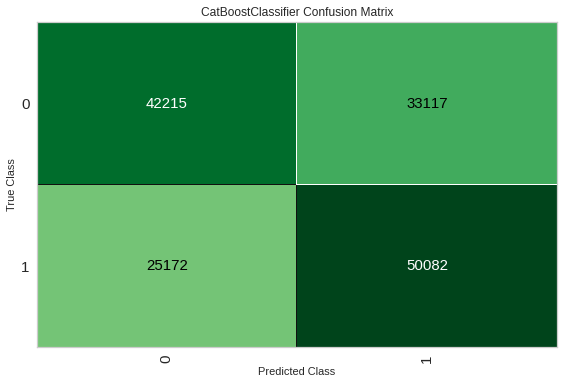

In [50]:
plot_model(model1, plot='confusion_matrix')

In [51]:
# 모델 생성2
model2 = create_model('lightgbm')
# 36s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6142,0.6601,0.6721,0.6022,0.6352,0.2285,0.2301
1,0.6130,0.6576,0.6718,0.6009,0.6344,0.2260,0.2276
2,0.6141,0.6615,0.6759,0.6014,0.6364,0.2283,0.2301
3,0.6108,0.6563,0.6717,0.5986,0.6330,0.2217,0.2234
4,0.6085,0.6555,0.6637,0.5976,0.6289,0.2171,0.2185
Mean,0.6122,0.6582,0.6710,0.6001,0.6336,0.2244,0.2259
SD,0.0022,0.0023,0.0040,0.0017,0.0026,0.0044,0.0045


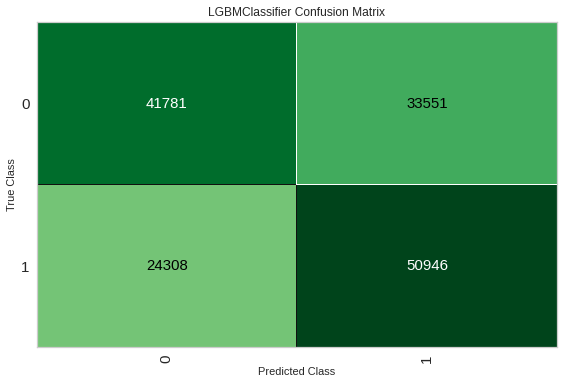

In [52]:
plot_model(model2, plot='confusion_matrix')

In [53]:
# tune model
tuned_model2 = tune_model(model2, optimize='F1', early_stopping=True)
# 8m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6254,0.6733,0.6704,0.6148,0.6414,0.2508,0.2519
1,0.6236,0.6709,0.6720,0.6125,0.6409,0.2473,0.2485
2,0.6239,0.6732,0.6702,0.6132,0.6404,0.2479,0.2490
3,0.6209,0.6689,0.6687,0.6101,0.6380,0.2417,0.2429
4,0.6209,0.6696,0.6664,0.6106,0.6373,0.2418,0.2429
Mean,0.6229,0.6712,0.6695,0.6122,0.6396,0.2459,0.2470
SD,0.0018,0.0018,0.0019,0.0017,0.0016,0.0036,0.0036


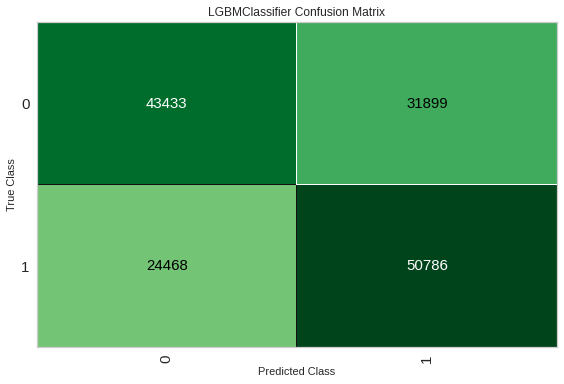

In [54]:
plot_model(tuned_model2, plot='confusion_matrix')

In [55]:
# blend
blended_model = blend_models([model1, model2], optimize='F1', method='soft')
# 2m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6147,0.6600,0.6680,0.6034,0.6341,0.2294,0.2308
1,0.6127,0.6575,0.6671,0.6015,0.6326,0.2255,0.2269
2,0.6148,0.6618,0.6715,0.6029,0.6354,0.2297,0.2312
3,0.6104,0.6558,0.6658,0.5991,0.6307,0.2208,0.2221
4,0.6091,0.6551,0.6603,0.5988,0.6280,0.2183,0.2194
Mean,0.6123,0.6580,0.6665,0.6011,0.6321,0.2247,0.2261
SD,0.0023,0.0025,0.0037,0.0019,0.0026,0.0046,0.0046


In [56]:
# optimize threshold for trained model
best_thr1 = optimize_threshold(blended_model)
best_thr1
# 26m

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7ff4a04a78d0>),
                             ('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=0, reg_alpha=0.0,
                                             reg_la

In [57]:
# blend
blended_model2 = blend_models([model1, tuned_model2], optimize='F1', method='soft')
# 2m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6247,0.6725,0.6742,0.6132,0.6423,0.2494,0.2506
1,0.6230,0.6700,0.6742,0.6114,0.6412,0.2461,0.2474
2,0.6250,0.6732,0.6763,0.6131,0.6432,0.2501,0.2514
3,0.6197,0.6675,0.6704,0.6085,0.6380,0.2395,0.2407
4,0.6192,0.6679,0.6684,0.6083,0.6370,0.2385,0.2397
Mean,0.6223,0.6702,0.6727,0.6109,0.6403,0.2447,0.2460
SD,0.0024,0.0023,0.0029,0.0021,0.0024,0.0049,0.0049


In [58]:
# optimize threshold for trained model
best_thr2 = optimize_threshold(blended_model2)
best_thr2
# 31m

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7ff49ba65d50>),
                             ('lightgbm',
                              LGBMClassifier(bagging_fraction=0.8,
                                             bagging_freq=1,
                                             boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             feature_fraction=0.8,
                                             importance_type='split',
                                             learning_rate=0.2, max_depth=-1,
                                             min_child_samples=76,
                                             min_child_weight=0.001,
                                             min_split_gain=0.1,
                                             n_estimators=180, n_jobs=-1,
        

## train 예측, F1 자체평가

In [ ]:
# th = 0.2932

In [62]:
# train예측
train_pred = predict_model(best_thr1, train)

In [63]:
from pycaret.utils import check_metric
check_metric(train['target'], train_pred['Label'], metric = 'F1')

0.6393

In [64]:
# th2 = 0.2982

In [65]:
# train예측
train_pred2 = predict_model(best_thr2, train)

In [66]:
check_metric(train['target'], train_pred2['Label'], metric = 'F1')

0.6666

## test 예측

In [67]:
# 예측
pred = predict_model(best_thr2, test)

In [68]:
pred.iloc[:,-2:].head(20)

,Label,Score
0,1,0.5145
1,0,0.5527
2,0,0.5786
3,0,0.5078
4,1,0.5202
5,0,0.7648
6,1,0.5347
7,0,0.8213
8,0,0.5253
9,0,0.5082


In [69]:
pred['Label'].value_counts()

1    25556
0    20848
Name: Label, dtype: int64

# 제출파일 불러오기

In [ ]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


# 제출파일 생성

In [ ]:
# sub['target'] = pred['Label']
# sub.to_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver2.6.csv', index=False)

# 코드 마지막